<a href="https://colab.research.google.com/github/jordinava91/Various/blob/main/Act_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Actividad Semana 6, Proyecto Final "Machine Learning". Equipo 3

In [ ]:
pip install xgboost

In [ ]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection, metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn import model_selection, preprocessing, ensemble
%matplotlib inline

from google.colab import files
uploaded = files.upload()

Saving bank-additional-full.csv to bank-additional-full.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['bank-additional-full.csv']), sep=';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   job          41188 non-null  object
 1   marital      41188 non-null  object
 2   education    41188 non-null  object
 3   default      41188 non-null  object
 4   housing      41188 non-null  object
 5   loan         41188 non-null  object
 6   contact      41188 non-null  object
 7   month        41188 non-null  object
 8   day_of_week  41188 non-null  object
 9   poutcome     41188 non-null  object
 10  y            41188 non-null  object
dtypes: object(11)
memory usage: 3.5+ MB


Creación de diccionario para crear base con variables numéricas

In [ ]:
dic_job = {
    "job":{
        "admin.":1,
        "blue-collar":2,
        "entrepreneur":3,
        "housemaid":4,
        "management":5,
        "retired":6,
        "self-employed":7,
        "services":8,
        "student":9,
        "technician":10,
        "unemployed":11,
        "unknown":12 
    }}
dic_marital = {
    "marital":{
        "divorced":1,
        "married":2,
        "single":3,
        "unknown":4   
    }}
dic_education = {
    "education":{
        "basic.4y":1,
        "basic.6y":2,
        "basic.9y":3,
        "high.school":4,
        "professional.course":5,
        "university.degree":6,
        "illiterate":7,
        "unknown":8
    }}
dic_default = {
    "default":{
        "no":0,
        "yes":1,
        "unknown":2
    }}
dic_housing = {
    "housing":{
        "no":0,
        "yes":1,
        "unknown":2
    }}
dic_loan = {
    "loan":{
        "no":0,
        "yes":1,
        "unknown":2
    }}
dic_contact = {
    "contact":{
        "cellular":0,
        "telephone":1,
        "unknown":2
    }}
dic_month = {
    "month":{
        "jan":1,
        "feb":2,
        "mar":3,
        "apr":4,
        "may":5,
        "jun":6,
        "jul":7,
        "aug":8,
        "sep":9,
        "oct":10,
        "nov":11,
        "dec":12, 
        "unknown":13
    }}
dic_day_of_week = {
    "day_of_week":{
        "mon":1,
        "tue":2,
        "wed":3,
        "thu":4,
        "fri":5,
        "unknown":6
    }}
dic_poutcome = {
    "poutcome":{
        "failure":0,
        "nonexistent":1,
        "success":2,
        "unknown":3
    }}
dic_y = {
    "y":{
        "no":0,
        "yes":1,
        "unknown":2
    }}

In [ ]:
# Tomamos los valores del diccionario y sustituímos valores en el dataframe
for i in [dic_job, dic_marital, dic_education, dic_default, dic_housing, dic_loan, dic_contact, dic_month, dic_day_of_week, dic_poutcome, dic_y]:
    df.replace(i,inplace=True)

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,4,2,1,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,8,2,4,2,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,8,2,4,0,1,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,1,2,2,0,0,0,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,8,2,4,0,0,1,1,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [ ]:
df.describe()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.00000,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,...,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,4.72458,2.172769,4.325337,0.417525,0.571914,0.199767,0.365252,6.607896,2.979581,...,2.567593,962.475454,0.172963,0.930101,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,10.42125,3.59456,0.608902,1.778046,0.812813,0.541209,0.456002,0.481507,2.040998,1.411514,...,2.770014,186.910907,0.494901,0.362886,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,17.00000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,3.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.00000,1.00000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2.000000,...,1.000000,999.000000,0.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.00000,3.00000,2.000000,4.000000,0.000000,1.000000,0.000000,0.000000,6.000000,3.000000,...,2.000000,999.000000,0.000000,1.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.00000,8.00000,3.000000,6.000000,0.000000,1.000000,0.000000,1.000000,8.000000,4.000000,...,3.000000,999.000000,0.000000,1.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.00000,12.00000,4.000000,8.000000,2.000000,2.000000,2.000000,1.000000,12.000000,5.000000,...,56.000000,999.000000,7.000000,2.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [ ]:
# Impresión de correlaciones, por si quisiéramos ajustar aún más el modelo a las variables más o menos correlacionadas con éste
corre = df.corr()
print(corre['y'].sort_values(axis=0, ascending=True))

nr.employed      -0.354678
pdays            -0.324914
euribor3m        -0.307771
emp.var.rate     -0.298334
contact          -0.144773
cons.price.idx   -0.136211
default          -0.099324
campaign         -0.066357
loan             -0.005038
housing           0.009552
day_of_week       0.010051
job               0.025122
age               0.030399
month             0.037187
marital           0.046203
cons.conf.idx     0.054878
education         0.056510
poutcome          0.129789
previous          0.230181
duration          0.405274
y                 1.000000
Name: y, dtype: float64


In [ ]:
df['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

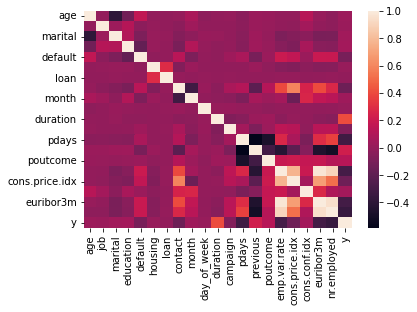

In [ ]:
sns.heatmap(corre)

In [ ]:
# Seleccionamos para nuestra nueva base sólo las variables no negativas
base_depurada = df[["housing","day_of_week", "job", "age", "month", "marital", "cons.conf.idx", "education", "poutcome", "previous", "duration", "y"]]
df_depur = base_depurada.copy()
df_depur.head()

,housing,day_of_week,job,age,month,marital,cons.conf.idx,education,poutcome,previous,duration,y
0,0,1,4,56,5,2,-36.4,1,1,0,261,0
1,0,1,8,57,5,2,-36.4,4,1,0,149,0
2,1,1,8,37,5,2,-36.4,4,1,0,226,0
3,0,1,1,40,5,2,-36.4,2,1,0,151,0
4,0,1,8,56,5,2,-36.4,4,1,0,307,0


housing          0.009552
day_of_week      0.010051
job              0.025122
age              0.030399
month            0.037187
marital          0.046203
cons.conf.idx    0.054878
education        0.056510
poutcome         0.129789
previous         0.230181
duration         0.405274
y                1.000000
Name: y, dtype: float64


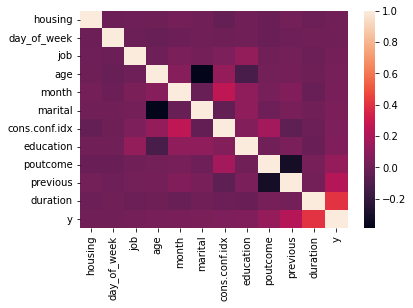

In [ ]:
# Copiamos la base a otra, eliminando las variables con menos correlación
corre_depur = df_depur.corr()
print(corre_depur['y'].sort_values(axis=0, ascending=True))
sns.heatmap(corre_depur)

In [ ]:
# Corremos el modelo con profundidad de 10 
target = df_depur['y']
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(df_depur, target)
pred1 = clf.predict(df_depur)
accuracy_score(pred1, target)

1.0

In [ ]:
# Entrenaremos al modelo con 70% de los datos, y probaremos el nivel de predicción con el 30% restante
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_depur, target, test_size = 0.3)

In [ ]:
# Evaluamos nuevamente el modelo, entrenado con 70% de los datos y se prueba con 30% restante que no se usó para el entrenamiento
clf = DecisionTreeClassifier(max_depth = 10)
clf.fit(X_train, y_train)
pred1 = clf.predict(X_train)
print("Predicción entrenamiento", accuracy_score(pred1, y_train)) # Resultado del entrenamiento 
pred2 = clf.predict(X_test)
print("Predicción test", accuracy_score(pred2,y_test)) # Resultado con datos de prueba no usados en entrenamiento (30%)

Predicción entrenamiento 1.0
Predicción test 1.0


In [ ]:
# Probamos la efienciencia del modelo con diferentes niveles de profundidad
for i in range(1,100):
    print("Profundidad", i)
    clf = DecisionTreeClassifier(max_depth = i)
    clf.fit(X_train, y_train)
    pred1 = clf.predict(X_train)
    print("Predicción con datos de entrenamiento", accuracy_score(pred1, y_train)) # Resultado de entrenamiento 
    pred2 = clf.predict(X_test)
    print("Predicción con datos no usados en entrenamiento", accuracy_score(pred2,y_test)) # Resultado con datos de prueba no usados en entrenamiento

Profundidad 1
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 2
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 3
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 4
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 5
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 6
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 7
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 8
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 9
Predicción con datos de entrenamiento 1.0
Predicción con datos no usados en entrenamiento 1.0
Profundidad 10
Predicción co

In [ ]:
    clf = DecisionTreeClassifier(max_depth = 3)
    clf.fit(X_train, y_train)
    pred_final = clf.predict(X_train)
    accuracy_score(pred_final, y_train)

1.0

In [ ]:
# Ya que duración es la variable con mayor correlación, probamos el éxito de una llamada de 500s
print(clf.predict_proba(np.array([0,0,0,0,0,0,0,0,1,0,500,0]).reshape(1, -1)))
print(clf.predict(np.array([0,0,0,0,0,0,0,0,1,0,500,0]).reshape(1, -1)))

[[1. 0.]]
[0]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
